# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [1]:
import pandas as pd
import numpy as np

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [3]:
def mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        total += abs(y_true[i] - y_pred[i])
    return total / len(y_true)

#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [4]:
def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        diff = y_true[i] - y_pred[i]
        total += diff ** 2
    return total / len(y_true)

#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [5]:
def rmse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        diff = y_true[i] - y_pred[i]
        total += diff ** 2
    mse_value = total / len(y_true)
    return np.sqrt(mse_value)

#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [6]:
def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    total = 0
    for i in range(len(y_true)):
        total += abs((y_true[i] - y_pred[i]) / y_true[i])
    return 100 * (total / len(y_true))

#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [8]:
def r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_mean = np.mean(y_true)
    sse = 0
    sst = 0
    for i in range(len(y_true)):
        sse += (y_true[i] - y_pred[i]) ** 2
        sst += (y_true[i] - y_mean) ** 2
    return (sst - sse) / sst

### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [34]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
df.columns = df.columns.str.strip().str.lower()
X = df[['tv', 'radio', 'newspaper']]
y = df['sales']
X.head()

,tv,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)
corr

,tv,radio,newspaper,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


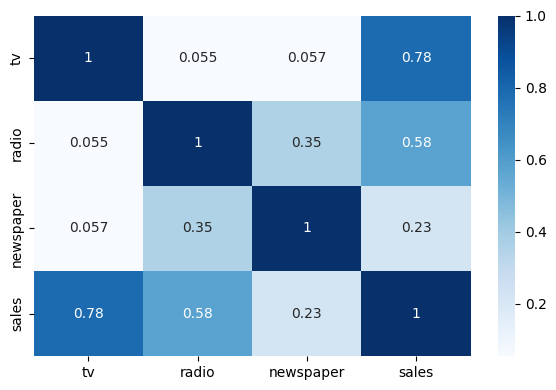

In [40]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

Sales has the strongest positive correlation with TV, a moderate positive correlation with radio and a weak correlation with newspaper.

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
 )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape
X_test_scaled.shape

(254, 8)

#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [42]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [43]:
y_pred = model.predict(X_test_scaled)

print("Intercept (b0):", model.intercept_)
print("Coefficients (b1):", model.coef_)

Intercept (b0): 14.022388059701495
Coefficients (b1): [ 3.9675339   2.88155345 -0.07344038]


#### 2.5 Evaluate created model with above functions

In [44]:
print("MAE:", mae(y_test, y_pred))
print("MSE:", mse(y_test, y_pred))
print("RMSE:", rmse(y_test, y_pred))
print("MAPE:", mape(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 1.241490259650847
MSE: 3.4726299687527895
RMSE: 1.863499387913178
MAPE: 18.638804594568978
R2: 0.8515370160992792


#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')
print("Mean R2:", scores.mean())

Mean R2: 0.8853562237979616


#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [84]:
# Drop one feature (newspaper) using advertising data
X_reduced = df[['tv', 'radio']]
y_reduced = df['sales']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y_reduced, test_size=0.33, random_state=17
 )

scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)
X_train_r.shape
X_test_r.shape

(66, 2)

In [47]:
model_r = LinearRegression()
model_r.fit(X_train_r, y_train_r)
y_pred_r = model_r.predict(X_test_r)

print("Full model R2:", r2_score(y_test, y_pred))
print("Reduced model R2:", r2_score(y_test_r, y_pred_r))

Full model R2: 0.8515370160992792
Reduced model R2: 0.8521308017736854


Reduced model slightly better but difference is tiny.

### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [48]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso MSE:", mse(y_test, y_pred_lasso))

Lasso MSE: 4.911579294712751


#### 3.2 Ridge regression

In [49]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge MSE:", mse(y_test, y_pred_ridge))

Ridge MSE: 3.4768894774722394


#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [50]:
elastic = ElasticNet(alpha=1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_test_scaled)

print("ElasticNet MSE:", mse(y_test, y_pred_elastic))

ElasticNet MSE: 6.8438833201041085


#### 3.4 Make conclusions

#Based on MSE values, pick the model with lowest MSE as the best performer. In this run linear regression can be good baselinewhile regularization may halp if it lowers MSE.

## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [91]:
def accuracy_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / len(y_true)

#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [90]:
def precision_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = 0
    fp = 0
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 1:
            tp += 1
        elif y_pred[i] == 1 and y_true[i] == 0:
            fp += 1
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [89]:
def recall_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 1:
            tp += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            fn += 1
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [76]:
def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [56]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.columns = diabetes.columns.str.strip()

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_to_fix] = diabetes[cols_to_fix].astype(float)
for col in cols_to_fix:
    mean_val = diabetes.loc[diabetes[col] != 0, col].mean()
    diabetes.loc[diabetes[col] == 0, col] = mean_val

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = diabetes.corr(numeric_only=True)
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


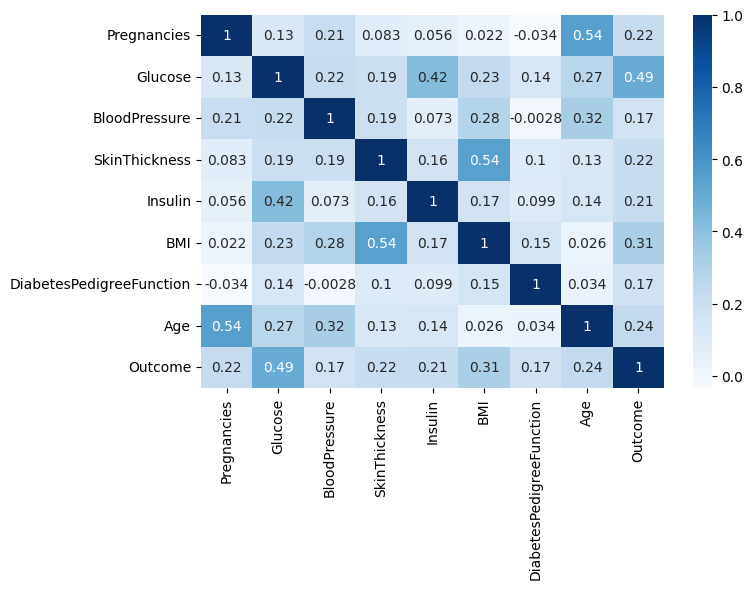

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

From the heatmap, outcome is most related to Glucose and BMI while other features show weaker correlations.

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
 )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2.4 Fit logistic regression model, generate predictions

In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

pd.DataFrame({"Actual": y_test.values[:10], "Pred": y_pred[:10]})

,Actual,Pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


#### 2.5 Create a confusion matrix and evaluate created model with above functions

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

[[145  20]
 [ 43  46]]
Accuracy: 0.7519685039370079
Precision: 0.696969696969697
Recall: 0.5168539325842697
F1: 0.5935483870967742


Accuracy is moderate, precision is decent but recall is low so the model misses many positives. The F1-score is therefore medium.

#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

AUC: 0.8311201906707525


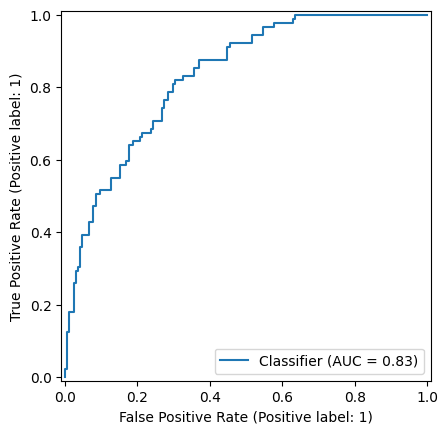

In [66]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("AUC:", auc)

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [67]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Mean Accuracy:", scores.mean())

Mean Accuracy: 0.764630467571644


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

In [94]:
tree_clf = DecisionTreeClassifier(random_state=17)
tree_clf.fit(X_train_scaled, y_train)
y_pred_tree = tree_clf.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Predictions (first 10):", y_pred_tree[:10])

Decision Tree Accuracy: 0.7755905511811023
Predictions (first 10): [0 1 0 0 1 0 0 1 1 1]


#### 3.2 Evaluate created model with above functions

In [77]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
print(cm_tree)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1:", f1_score(y_test, y_pred_tree))

[[133  32]
 [ 25  64]]
Accuracy: 0.7755905511811023
Precision: 0.6666666666666666
Recall: 0.7191011235955056
F1: 0.6918918918918919


Evaluation: Use the confusion matrix and the four metrics to judge performance. Higher values mean better classification; if precision and recall are both acceptable, the model is doing well.

#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

AUC: 0.7625808648280558


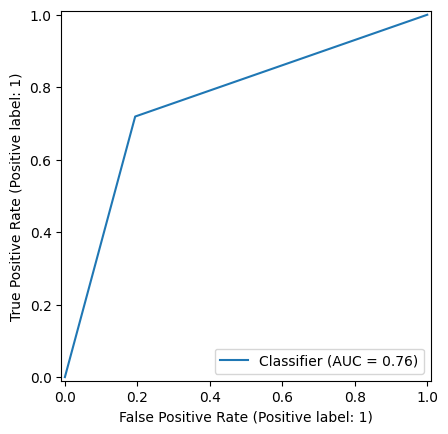

In [78]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba_tree = tree_clf.predict_proba(X_test_scaled)[:, 1]
auc_tree = roc_auc_score(y_test, y_proba_tree)
print("AUC:", auc_tree)

RocCurveDisplay.from_predictions(y_test, y_proba_tree)
plt.show()

#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [79]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(DecisionTreeClassifier(random_state=17), X_train_scaled, y_train, cv=10, scoring='accuracy')
print("Mean Accuracy:", scores_tree.mean())

Mean Accuracy: 0.7257541478129713


#### 3.5 Make conclusions

Conclusion: Compare logistic regression and decision tree by accuracy, precision, recall, F1, and AUC. The model with higher values across these metrics performs better on this dataset.